<a href="https://colab.research.google.com/github/Ayon150/AI/blob/main/EFFECT_OF_DATA_AUGMENTATION_ON_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Training with No Augmentation
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.8808 - loss: 0.3303 - val_accuracy: 0.9355 - val_loss: 0.1738
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.9406 - loss: 0.1598 - val_accuracy: 0.9495 - val_loss: 0.1478
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.9475 - loss: 0.1357 - val_accuracy: 0.9520 - val_loss: 0.1372
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.9508 - loss: 0.1246 - val_accuracy: 0.9485 - val_loss: 0.1361
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.9542 - loss: 0.1232 - val_accuracy: 0.9535 - val_loss: 0.1280
No Augmentation Validation Accuracy: 0.9535

Training with Rotation
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 150ms/step - accuracy: 0.8382 - loss: 0.3864 - val_accuracy: 0.9365 - val_loss: 0.1770
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 141ms/step - accuracy: 0.9349 - loss: 0.1711 - val_accuracy: 0.9490 - val_loss: 0.1541
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━

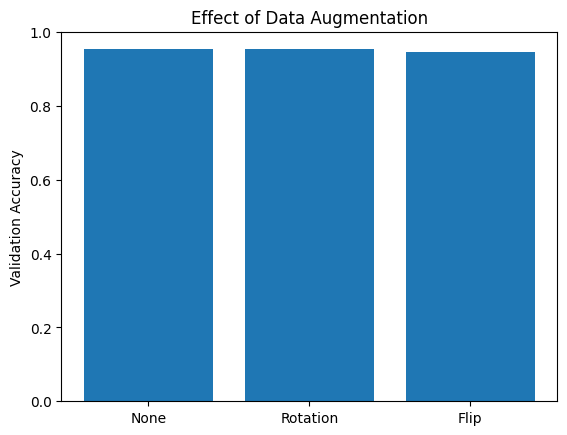

In [1]:
# ==============================================
# Q12 - Data Augmentation Experiment (SAFE VERSION)
# ==============================================

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import gc

# ----------------------------------------------
# 1. Load CIFAR-10
# ----------------------------------------------

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Use only two classes (binary classification)
mask_train = (y_train == 0) | (y_train == 1)
mask_test = (y_test == 0) | (y_test == 1)

x_train, y_train = x_train[mask_train.flatten()], y_train[mask_train.flatten()]
x_test, y_test = x_test[mask_test.flatten()], y_test[mask_test.flatten()]

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Resize to 128x128 (lighter than 224)
x_train = tf.image.resize(x_train, (128,128))
x_test = tf.image.resize(x_test, (128,128))

# ----------------------------------------------
# 2. Build Transfer Learning Model
# ----------------------------------------------

def build_model():
    base_model = VGG16(weights='imagenet',
                       include_top=False,
                       input_shape=(128,128,3))

    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# ----------------------------------------------
# 3. Function to Train with Augmentation
# ----------------------------------------------

def train_with_augmentation(datagen, title):
    print(f"\nTraining with {title}")

    model = build_model()

    history = model.fit(
        datagen.flow(x_train, y_train, batch_size=32),
        epochs=5,
        validation_data=(x_test, y_test),
        verbose=1
    )

    val_acc = history.history['val_accuracy'][-1]
    print(f"{title} Validation Accuracy: {val_acc:.4f}")

    # Clear memory
    del model
    gc.collect()
    tf.keras.backend.clear_session()

    return val_acc

# ----------------------------------------------
# 4. Different Augmentation Settings
# ----------------------------------------------

# No Augmentation
datagen_none = ImageDataGenerator()

# Rotation
datagen_rotation = ImageDataGenerator(rotation_range=20)

# Flip
datagen_flip = ImageDataGenerator(horizontal_flip=True)

# ----------------------------------------------
# 5. Run Experiments
# ----------------------------------------------

acc_none = train_with_augmentation(datagen_none, "No Augmentation")
acc_rotation = train_with_augmentation(datagen_rotation, "Rotation")
acc_flip = train_with_augmentation(datagen_flip, "Horizontal Flip")

# ----------------------------------------------
# 6. Compare Results
# ----------------------------------------------

methods = ['None', 'Rotation', 'Flip']
accuracies = [acc_none, acc_rotation, acc_flip]

plt.figure()
plt.bar(methods, accuracies)
plt.title("Effect of Data Augmentation")
plt.ylabel("Validation Accuracy")
plt.show()
